In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.interpolate

In [61]:
ext_type = 'cs'
nsamp = 3

EOSdir_name = ext_type+str(nsamp)+'EOS'
MRLdir_name = ext_type+str(nsamp)+'MRL'
datapath = os.getcwd() + "/data/"

numlist = []
num_eos, num_mrl = 0, 0
for file in os.listdir(datapath+EOSdir_name):
        if '.dat' in file:
            numlist.append(int(file[:-4]))
            num_eos += 1
            
for file in os.listdir(datapath+MRLdir_name):
        if '.dat' in file:
            numlist.append(int(file[:-4]))
            num_mrl += 1


In [62]:
print(10000-num_eos)

7967


In [63]:
maximum_mass = np.zeros(num_eos)
mass_max = np.zeros(num_eos)

In [64]:
# i = 0 
# for file in os.listdir(datapath+MRLdir_name):
#     file = datapath+MRLdir_name+'/'+str(i)+'.dat'
#     MRL = np.loadtxt(datapath+MRLdir_name+'/'+file)
#     Mass = MRL[:,0]
#     Radius = MRL[:,1]
    
#     maximum_mass[i] = np.max(Mass)
#     mass_max[i] = Mass[-1]

#     i += 1

for i in range(num_eos):
    file = datapath+MRLdir_name+'/'+str(i)+'.dat'
    MRL = np.loadtxt(file)
    Mass = MRL[:,0]
    Radius = MRL[:,1]
    
    maximum_mass[i] = np.max(Mass)
    mass_max[i] = Mass[-1]

(array([443., 428., 320., 261., 219., 141.,  98.,  69.,  42.,  12.]),
 array([1.80034296, 1.90552121, 2.01069947, 2.11587772, 2.22105597,
        2.32623423, 2.43141248, 2.53659074, 2.64176899, 2.74694724,
        2.8521255 ]),
 <BarContainer object of 10 artists>)

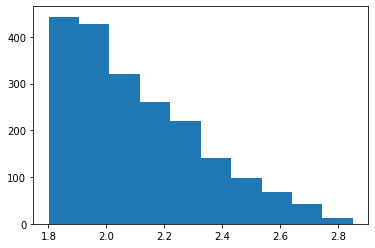

In [65]:
plt.hist(maximum_mass)

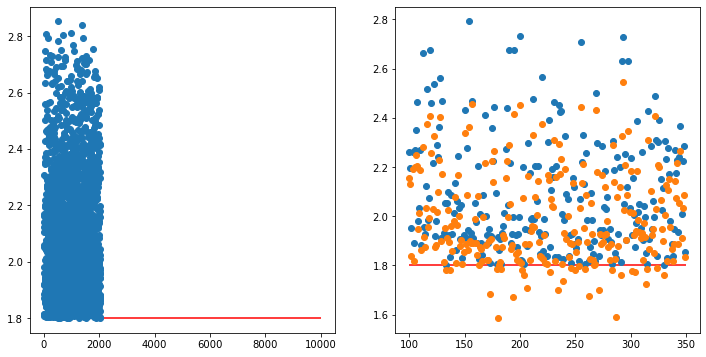

In [66]:
# plt.plot(np.arange(1000,number_eos-980,step=1), maximum_mass[1000:number_eos-980], 'o' )
fig, ax = plt.subplots(1,2, figsize=(12,6))
min_n = 100
max_n = 350

ax[0].plot(np.arange(0,num_eos,step=1), maximum_mass, 'o' )
ax[0].hlines(1.8, xmin=0, xmax=10000, color='r')

ax[1].plot(np.arange(min_n,max_n,step=1), maximum_mass[min_n:max_n], 'o' )
ax[1].plot(np.arange(min_n,max_n,step=1), mass_max[min_n:max_n], 'o' )
ax[1].hlines(1.8, xmin=min_n, xmax=max_n, color='r')

In [48]:
def plotMRL(ext_type, nsamp, index):
    MRLdir_name = ext_type+str(nsamp)+'MRL'
    datapath = os.getcwd() + "/data/"
    
    MRL = np.loadtxt(datapath+MRLdir_name+'/'+str(index)+'.dat')
    Mass = MRL[:,0]
    Radius = MRL[:,1]
    Lambda = MRL[:,2]
    
    max_index = np.argmax(MRL[:-2,0])
    
    print(np.mean(Mass), np.max(Mass))
    
    fig, ax = plt.subplots(1,2, figsize=(16,8))
    
    ax[0].plot(Radius, Mass, 'o', label=str(index))
    ax[0].set_xlabel('Radius (km)')
    ax[0].set_ylabel('Mass (Mo)')
    
    ax[1].plot(Mass, Lambda, label=str(index))
    ax[1].set_ylabel('$\Lambda$ (unitless)')
    ax[1].set_xlabel('Mass (Mo)')
    
    return MRL

1.2303993777935398 2.1221979458926015


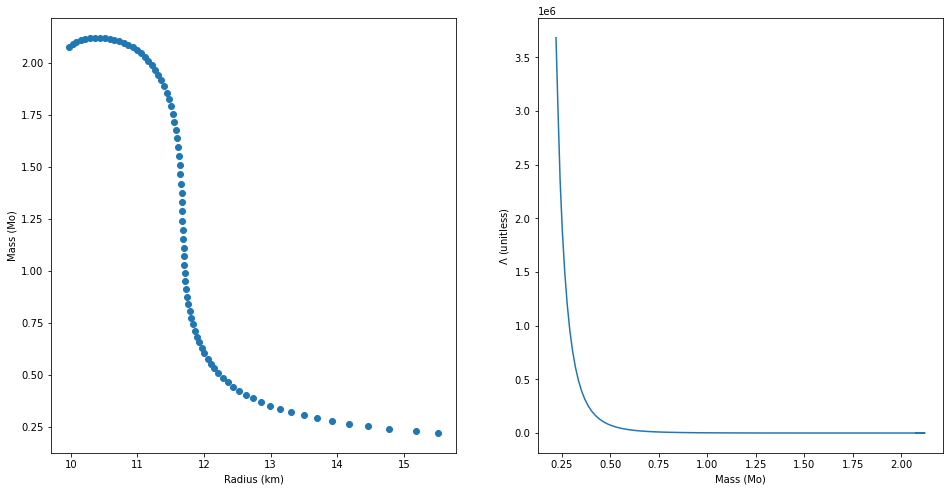

In [49]:
MRL = plotMRL('cs', nsamp, 427)

In [50]:
diffMRL = np.ediff1d(MRL[:,0])
drop_in_m = np.argmax(diffMRL < 0) # index of first drop in mass
above_m = np.argmax(MRL[:,0]>MRL[drop_in_m,0])
above_m

0

Text(0.5, 0, 'Mass (Mo)')

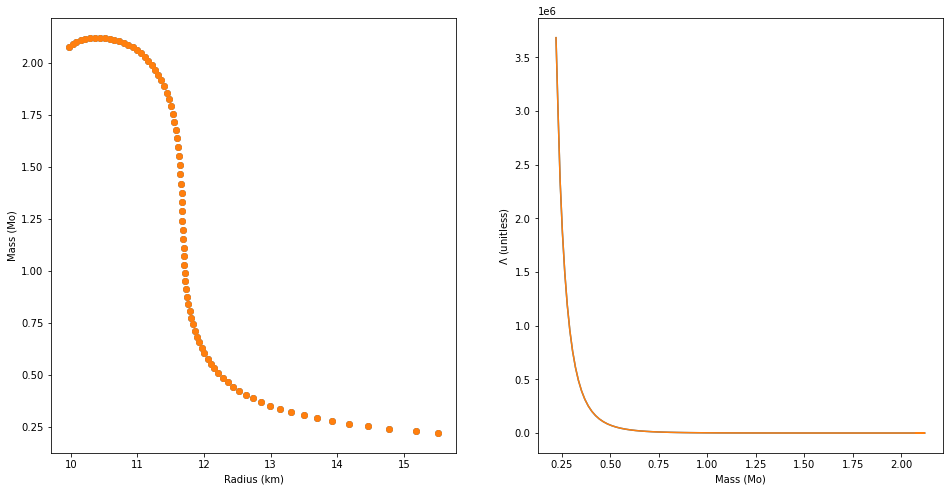

In [51]:
Mass = MRL[:,0]
Radius = MRL[:,1]
Lambda = MRL[:,2]

keep = np.zeros(MRL[:,0].shape[0], dtype=bool)
for i in range(MRL[:,0].shape[0]):
    keep[i] = i < drop_in_m or i > above_m
    
Mass_keep = MRL[keep,0]
Radius_keep = MRL[keep,1]
Lambda_keep = MRL[keep,2]

fig, ax = plt.subplots(1,2, figsize=(16,8))
    
ax[0].plot(Radius, Mass, 'o')
ax[0].plot(Radius_keep, Mass_keep, 'o')
ax[0].set_xlabel('Radius (km)')
ax[0].set_ylabel('Mass (Mo)')

ax[1].plot(Mass, Lambda)
ax[1].plot(Mass_keep, Lambda_keep)
ax[1].set_ylabel('$\Lambda$ (unitless)')
ax[1].set_xlabel('Mass (Mo)')

In [52]:
def plotEOS(ext_type, nsamp, index):
    EOSdir_name = ext_type+str(nsamp)+'EOS'
    datapath = os.getcwd() + "/data/"
    
    EOS = np.loadtxt(datapath+EOSdir_name+'/'+str(index)+'.dat')
    n = EOS[:,0]
    p = EOS[:,1]
    e = EOS[:,2]
    
    with open(datapath+EOSdir_name + '/' + str(index)+'.dat', 'r') as f:
        header = f.readline()
    print(header)
    
    cs2 = np.zeros(p.shape[0]-1)
    
    for j in range(p.shape[0]-1):
        cs2[j] = (p[j+1]-p[j])/(e[j+1]-e[j])
    
    fig, ax = plt.subplots(1,2, figsize=(16,8))
    
    ax[0].plot(e, p, 'o', label=str(index))
    ax[0].set_xlabel('Energy Density (MeV/fm$^3$)')
    ax[0].set_ylabel('Pressure (MeV/fm$^3$)')
    
    ax[1].plot(e[:p.shape[0]-1], cs2, label=str(index))
    ax[1].hlines(1, xmin=e[0], xmax=e[-2], color='r')
    ax[1].set_ylabel('Speed of Sound')
    ax[1].set_xlabel('Energy Density (MeV/fm$^3$)')
    
# def plot_fixedEOS(ext_type, nsamp, index):
#     EOSdir_name = ext_type+str(nsamp)+'fixedEOS'
#     datapath = os.getcwd() + "/data/"
    
#     EOS = np.loadtxt(datapath+EOSdir_name+'/'+str(index)+'.dat')
#     n = EOS[:,0]
#     p = EOS[:,1]
#     e = EOS[:,2]
    
#     with open(datapath+EOSdir_name + '/' + str(index)+'.dat', 'r') as f:
#         header = f.readline()
#     print(header)

#     cs2 = np.zeros(p.shape[0]-1)
    
#     for j in range(p.shape[0]-1):
#         cs2[j] = (p[j+1]-p[j])/(e[j+1]-e[j])
    
#     fig, ax = plt.subplots(1,2, figsize=(16,8))
    
#     ax[0].plot(e, p, 'o', label="fixed"+str(index))
#     ax[0].set_xlabel('Energy Density (MeV/fm$^3$)')
#     ax[0].set_ylabel('Pressure (MeV/fm$^3$)')
    
#     ax[1].plot(e[:p.shape[0]-1], cs2, label="fixed"+str(index))
#     ax[1].hlines(1, xmin=e[0], xmax=e[-2], color='r')
#     ax[1].set_ylabel('Speed of Sound')
#     ax[1].set_xlabel('Energy Density (MeV/fm$^3$)')

In [53]:
print(MRL[72:87,1])

[10.43265232 10.35752991 10.2835987  10.21393084 10.14846147 10.08552043
 10.02694066  9.97347611]


# ns =[0.32       0.62700283 0.73499706 1.75091512 1.89504721 1.92      ] cs =[0.36540786 0.87223814 0.21078694 0.76975235 0.76414514 0.47807688]



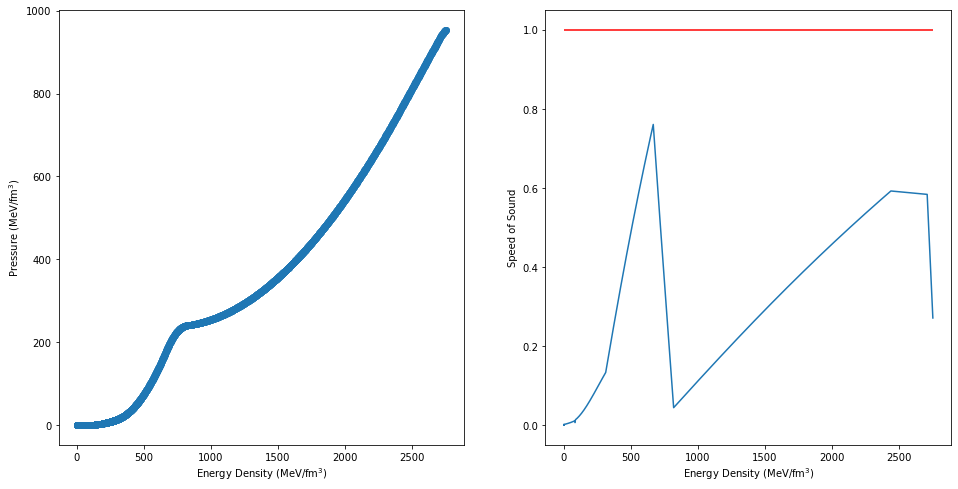

In [54]:
index = 4001
plotEOS('cs', nsamp, index)

In [55]:
def get_r1p4(MRL_table):
    max_index = np.argmax(MRL_table[:,0])
    clipped_MRL = MRL_table[:max_index-1,:]
        
    diffMRL = np.ediff1d(clipped_MRL[:,0])
    drop_in_m = np.argmax(diffMRL < 0) # index of first drop in mass
    above_m = np.argmax(clipped_MRL[:,0]>clipped_MRL[drop_in_m,0])
    
    keep = np.zeros(clipped_MRL[:,0].shape[0], dtype=bool)
    for i in range(clipped_MRL[:,0].shape[0]):
        keep[i] = i < drop_in_m or i > above_m
        
    fixed_MRL = clipped_MRL[keep,:]
    r_func = scipy.interpolate.CubicSpline(fixed_MRL[:,0], fixed_MRL[:,1])
    r1p4 = r_func(1.4)
    
    return r1p4

In [56]:
skip = 0
r1p4 = np.zeros(num_eos-skip)

for i in range(num_eos-skip):
    file = datapath+MRLdir_name+'/'+str(i+skip)+'.dat'
    MRL = np.loadtxt(file)

    r1p4[i] = get_r1p4(MRL)

Text(0.5, 0, '$R_{1.4}$ (km)')

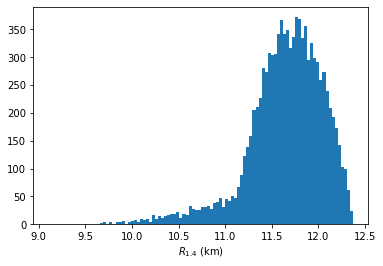

In [57]:
plt.hist(r1p4, bins=100)
plt.xlabel("$R_{1.4}$ (km)")

Text(0.5, 0, '$R_{1.4}$ (km)')

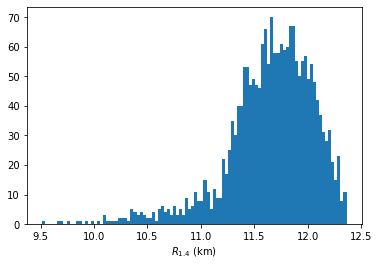

In [60]:
plt.hist(r1p4[:2000], bins=100)
plt.xlabel("$R_{1.4}$ (km)")

In [58]:
import TOVsolver
import pandas as pd
n0 = 0.16 #MeV/fm^3

EOS_small = pd.read_table('data/EOSCEFTVE1.dat', header=None).to_numpy()

n = EOS_small[:,0] 
p = EOS_small[:,1] 
e = EOS_small[:,2] 

# making cs=1 extention
max_n = 10*n0
n_step = 1e-3
size = int((max_n-n[-1])/n_step)

# initialize array
EOS_ex = np.zeros((size, 3))
# set starting values at n = 2n0
EOS_ex[0,0] = n[-1]
EOS_ex[0,1] = p[-1]
EOS_ex[0,2] = e[-1]

for k in range(size-1):
    # n_i+1
    EOS_ex[k+1,0] = EOS_ex[k,0] + n_step
    # p_i+1
    EOS_ex[k+1,1] = EOS_ex[k,1] + n_step*(EOS_ex[k,0])*((EOS_ex[k,1]+EOS_ex[k,2])/EOS_ex[k,0])
    # e_i+1
    EOS_ex[k+1,2] = EOS_ex[k,2] + n_step*((EOS_ex[k,1]+EOS_ex[k,2])/EOS_ex[k,0])

# get relevant sizes
size_smol = EOS_small.shape[0] -1 # -1 becuase we don't want last duplicated entry
size_ex = EOS_ex.shape[0]

# initialize array
cs_eq1_EOS = np.zeros((size_smol+size_ex, EOS_small.shape[1]))

cs_eq1_EOS[:size_smol,:] = EOS_small[:size_smol,:]
cs_eq1_EOS[size_smol:,:] = EOS_ex[:,:]

cs_eq1_MRL = TOVsolver.solve(cs_eq1_EOS, size=80)

Text(0.5, 0, 'Pressure (MeV/fm3)')

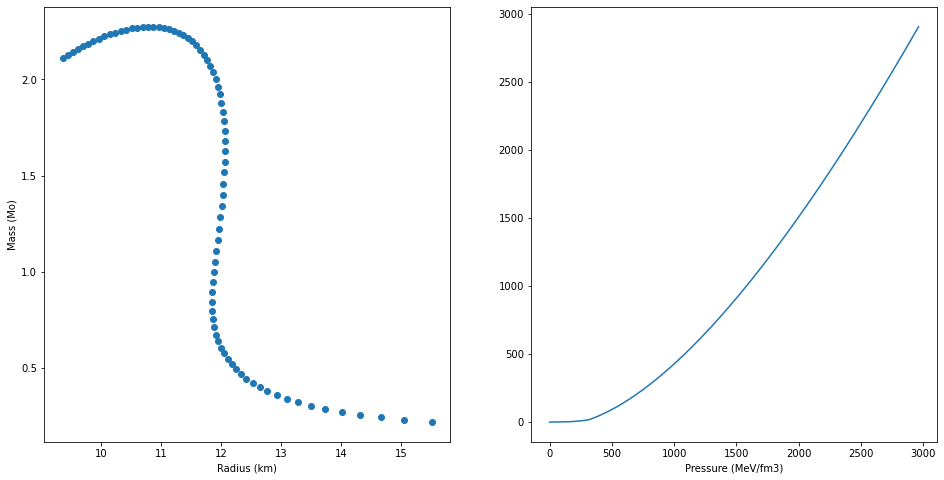

In [59]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
    
ax[0].plot(cs_eq1_MRL[:,1], cs_eq1_MRL[:,0], 'o')
ax[0].set_xlabel('Radius (km)')
ax[0].set_ylabel('Mass (Mo)')

ax[1].plot(cs_eq1_EOS[:,2], cs_eq1_EOS[:,1])
ax[1].set_xlabel('Energy Density (MeV/fm3)')
ax[1].set_xlabel('Pressure (MeV/fm3)')